In [37]:
library(tidyverse)


diversity_school <- read.csv("diversity_school.csv") 
tuition_cost <- read.csv("tuition_cost.csv") 

school_data <- dplyr::left_join(tuition_cost, diversity_school, by = c("name", "state")) %>%
    select(name, in_state_tuition, total_enrollment, category, enrollment)  %>% 
    mutate(category = as.factor(category)) %>% 
    filter(enrollment > 1) %>% 
    mutate(proportion = enrollment/total_enrollment) 

total_minority <- school_data %>% 
    filter(category == "Total Minority")

all_minorities_data <- school_data %>% 
    filter(category != "Total Minority", category != "Unknown", category != "Two Or More Races",  category != "Non-Resident Foreign", category != "Women")

merged_minorities_data <- school_data %>% 
    filter(category == "Total Minority" | category == "White")

school_data


name,in_state_tuition,total_enrollment,category,enrollment,proportion
<chr>,<int>,<int>,<fct>,<int>,<dbl>
Aaniiih Nakoda College,2380,291,Women,178,0.611683849
Aaniiih Nakoda College,2380,291,American Indian / Alaska Native,256,0.879725086
Aaniiih Nakoda College,2380,291,Hispanic,2,0.006872852
Aaniiih Nakoda College,2380,291,White,33,0.113402062
Aaniiih Nakoda College,2380,291,Total Minority,258,0.886597938
Abilene Christian University,34850,4427,Women,2562,0.578721482
Abilene Christian University,34850,4427,American Indian / Alaska Native,18,0.004065959
Abilene Christian University,34850,4427,Asian,46,0.010390784
Abilene Christian University,34850,4427,Black,387,0.087418116


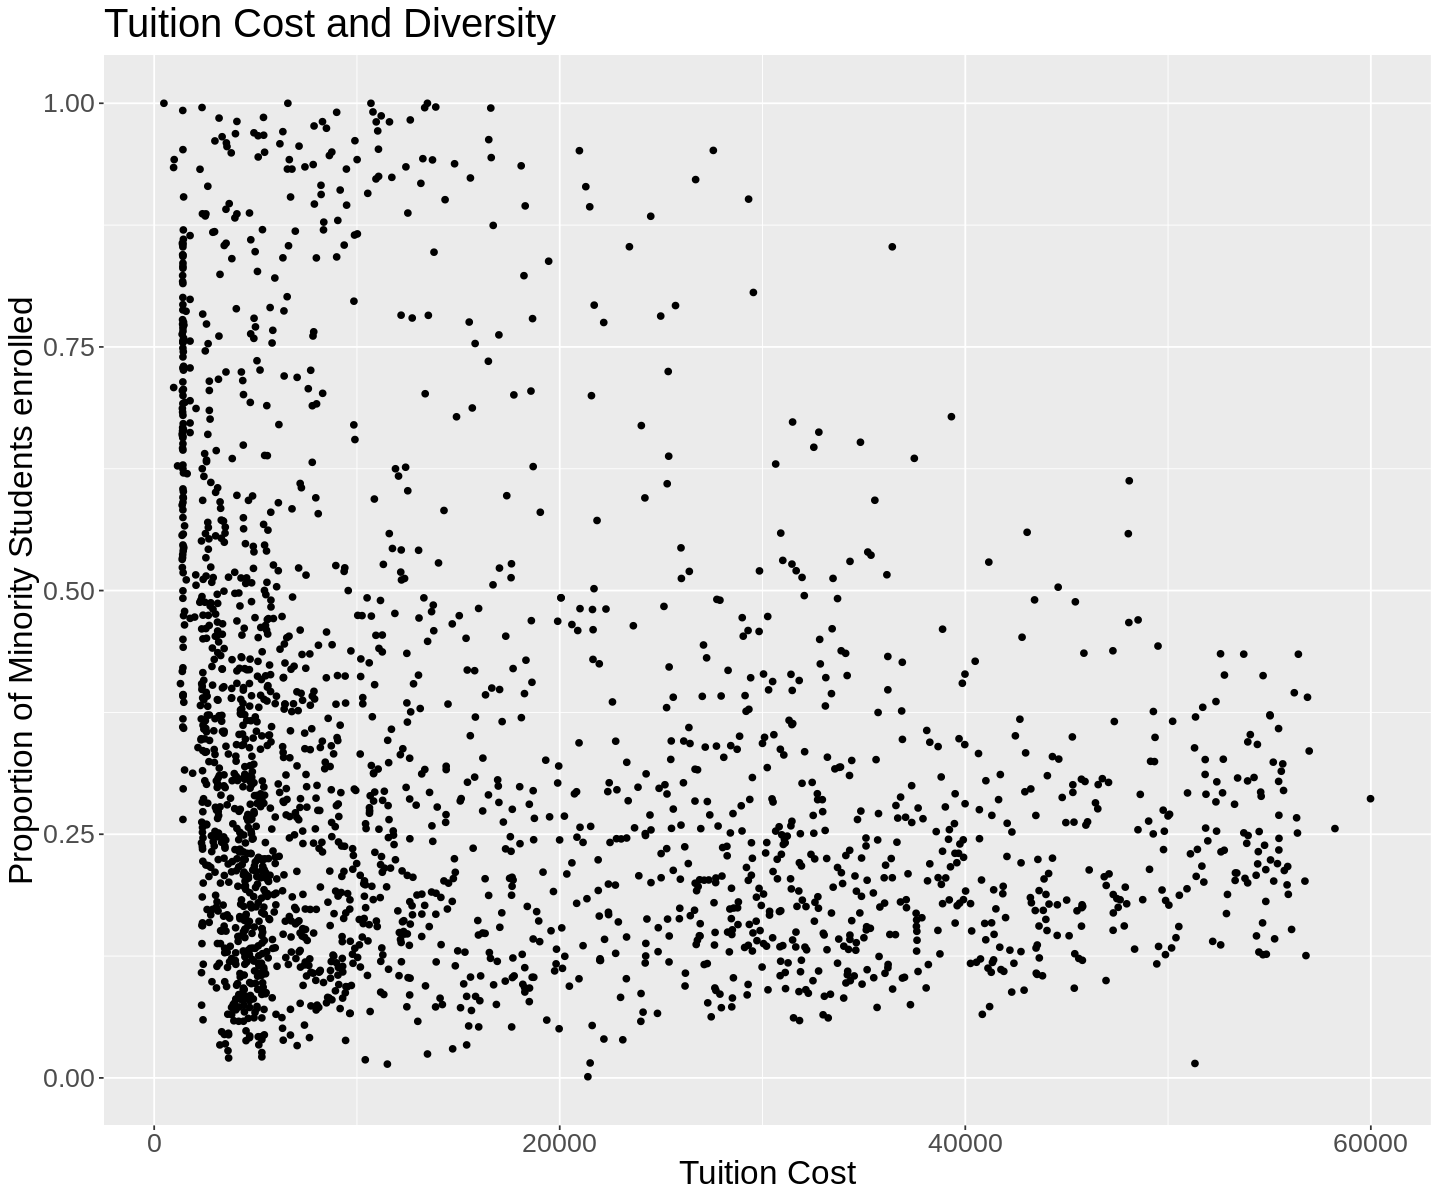

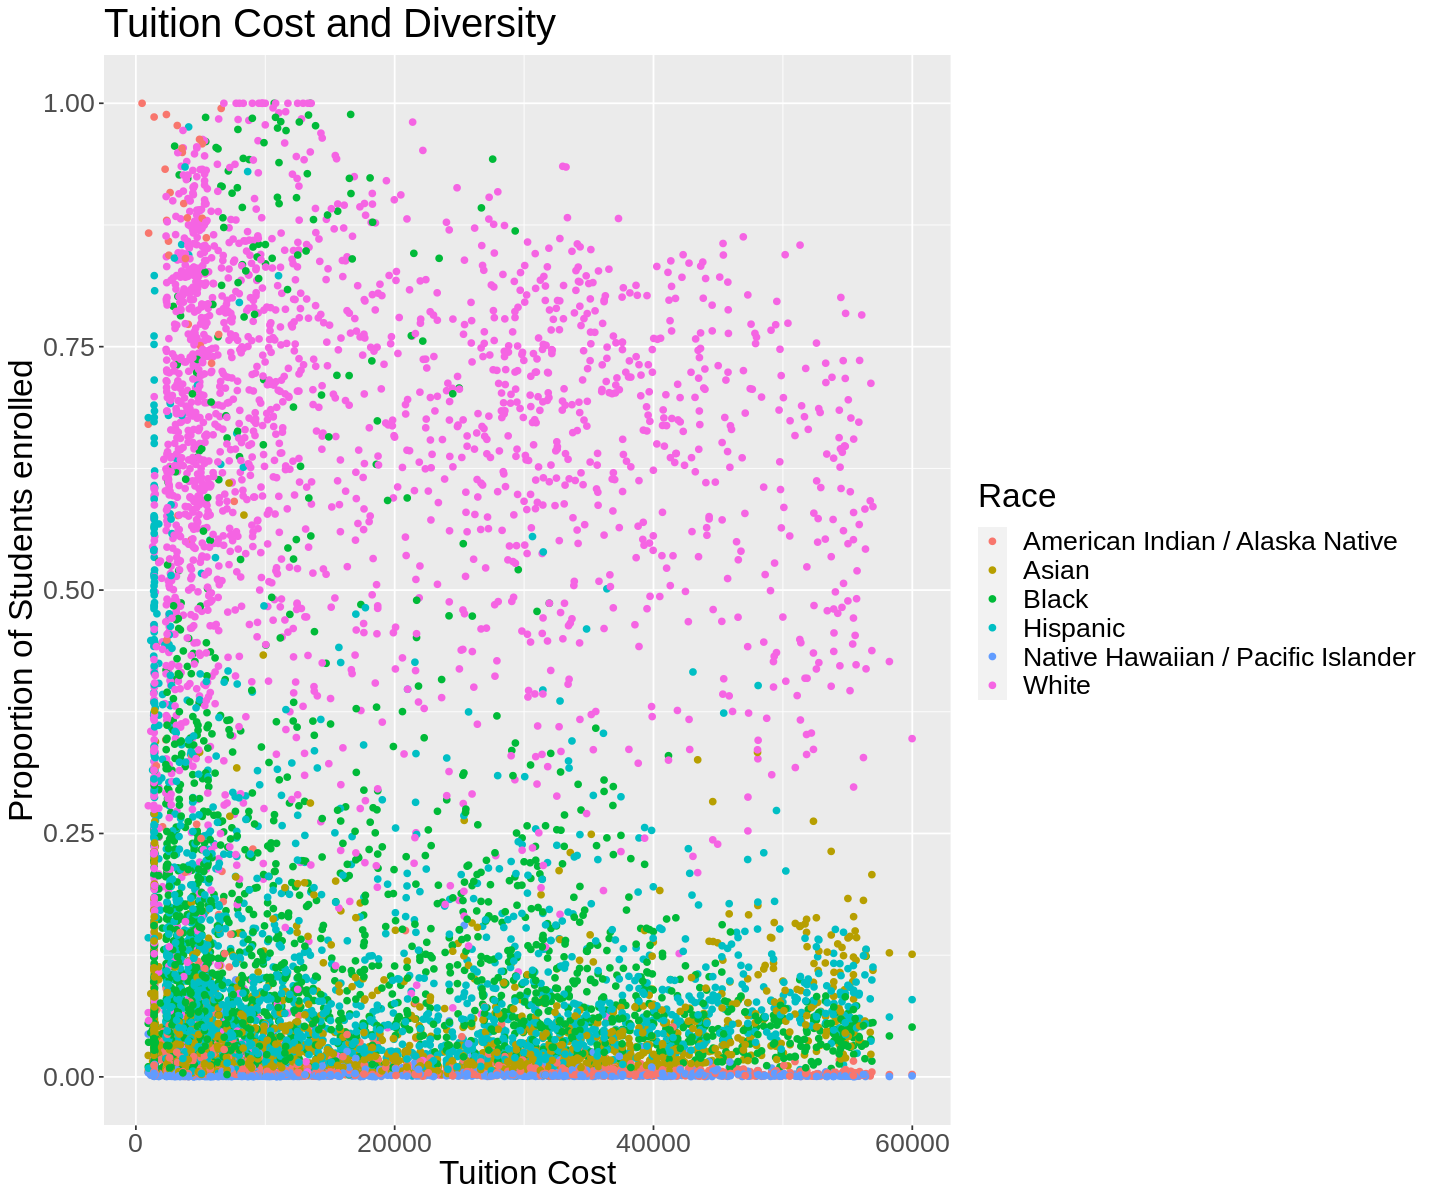

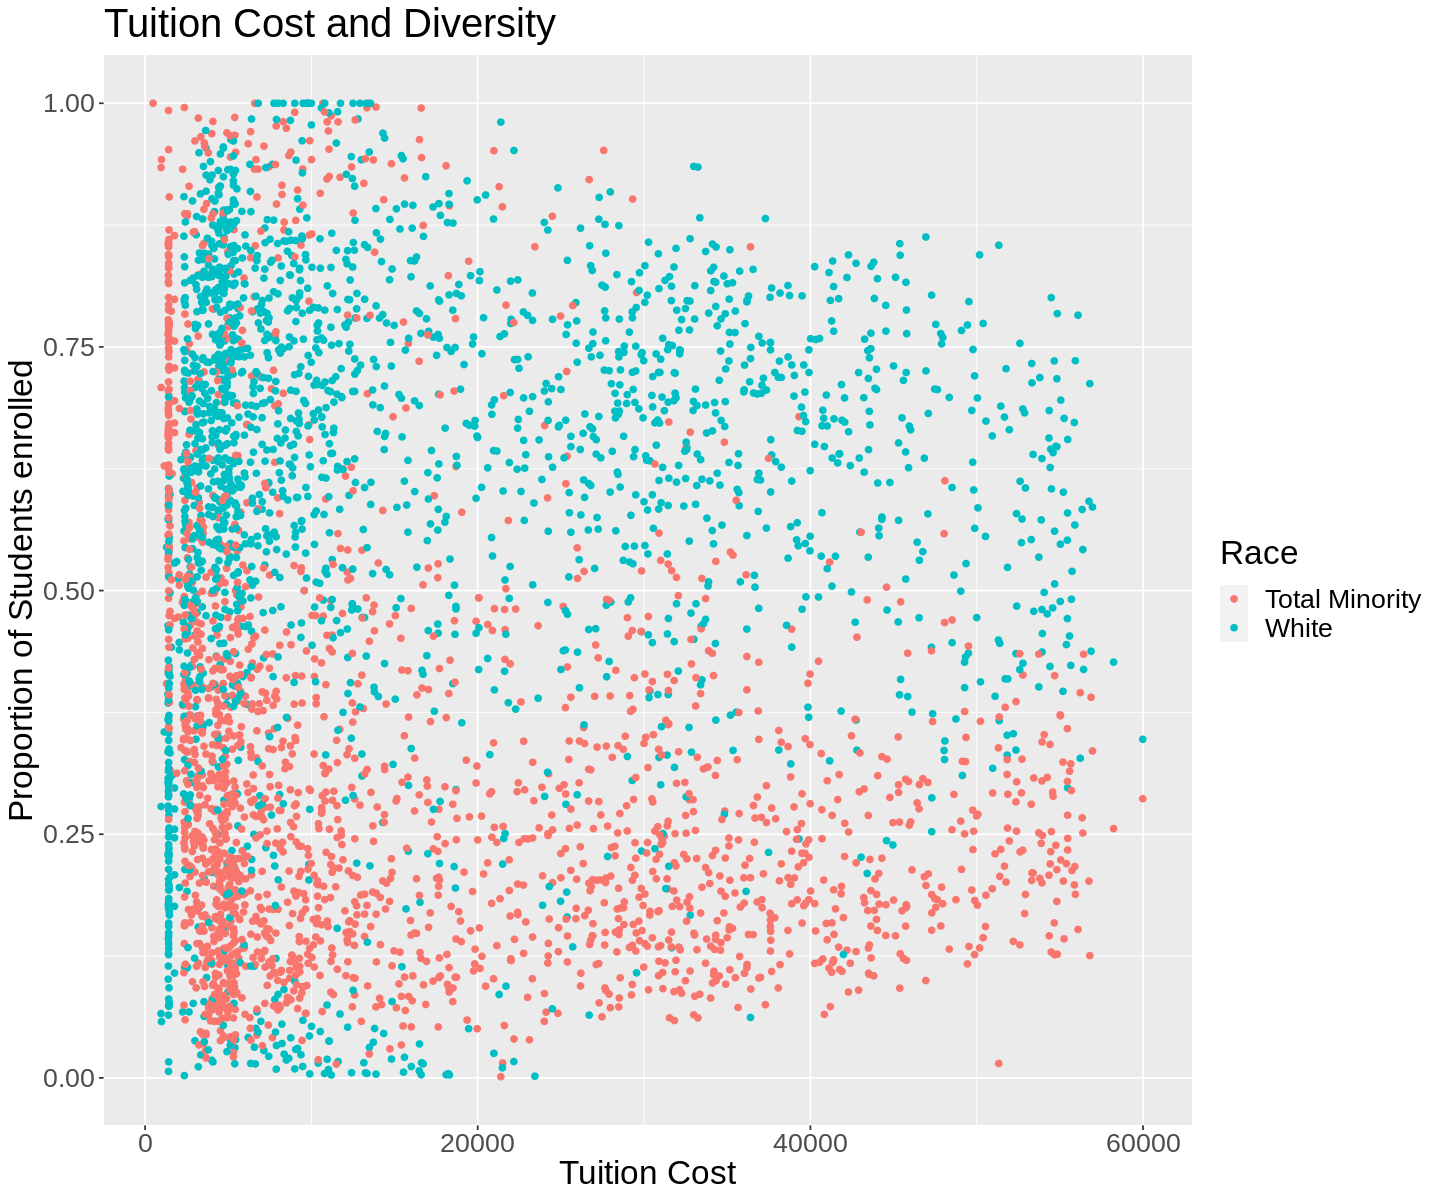

In [38]:
options(repr.plot.width = 12, repr.plot.height = 10)

total_minority_plot <- total_minority %>% 
    ggplot(aes(x = in_state_tuition, y = proportion)) +
    geom_point() +
    labs(x = "Tuition Cost", y = "Proportion of Minority Students enrolled", title = "Tuition Cost and Diversity") +
    theme(text = element_text(size = 20))

total_minority_plot

all_minorities_plot <- all_minorities_data %>% 
    ggplot(aes(x = in_state_tuition, y = proportion, color = category)) +
    geom_point() +
    labs(x = "Tuition Cost", y = "Proportion of Students enrolled", color = "Race", title = "Tuition Cost and Diversity") +
    theme(text = element_text(size = 20))

all_minorities_plot

merged_minorities_plot <- merged_minorities_data %>% 
    ggplot(aes(x = in_state_tuition, y = proportion, color = category)) +
    geom_point() +
    labs(x = "Tuition Cost", y = "Proportion of Students enrolled", color = "Race", title = "Tuition Cost and Diversity") +
    theme(text = element_text(size = 20))

merged_minorities_plot